# Visualizing Data for Classification

In a previous lab you explored the automotive price dataset to understand the relationships for a regression problem. In this lab you will explore the German bank credit dataset to understand the relationships for a classification problem. The difference being, that in classification problems the label is a categorical variable. 

Visualization for classification problems shares much in common with visualization for regression problems. Colinear features should be identified so they can be eliminted or otherwise dealt with. However, for classification problems you are looking for features that help **separate the label categories**. Separation is achieved when there are distinctive feature values for each label category. Good separation results in low classification error rate.

## Load and prepare the data set

As a first step you must load the dataset. 

Execute the code in the cell below to load the packages required for the rest of this notebook.

In [79]:
## Import packages
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4) # Set the initial plot area dimensions

The code in the cell below loads the dataset and assigns human-readable names to the columns. The shape and head of the data frame are then printed. Execute this code:

In [80]:
credit = read.csv('German_Credit_UCI.csv')
names(credit) = c('checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit')
print(dim(credit))
head(credit)

[1] 999  21


checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1


There are 20 features plus a label column. These features represent information a bank might have on its customers. There are both numeric and categorical features. However, the categorical features are coded in a way that makes them hard to understand. Further, the label is coded as $\{ 1,2 \}$ which is a bit awkward. 

The code in the cell below using a list of lists to recode the categorical features with human-readable text. The processing is performed with these steps:
1. Lists for each of the human readable codes are created for each column. The names of these lists are the codes in the raw data.
2. A list of lists is created with the column names used as the list names.
3. A list of categorical columns is created.
4. A for loop iterates over the column names. `sapply` is used to iterate over the codes in each column. The codes are used to generate names for the list lookup. 

Execute this code and examine the result: 

In [81]:
checking_account_status = c('< 0 DM', '0 - 200 DM', '> 200 DM or salary assignment', 'none')
names(checking_account_status) = c('A11', 'A12', 'A13', 'A14')
credit_history = c('no credit - paid', 'all loans at bank paid', 'current loans paid', 
                   'past payment delays',  'critical account - other non-bank loans')
names(credit_history) = c('A30', 'A31', 'A32', 'A33', 'A34')
purpose = c( 'car (new)', 'car (used)', 'furniture/equipment', 'radio/television', 
             'domestic appliances', 'repairs', 'education', 'vacation', 'retraining',
             'business', 'other')
names(purpose) = c('A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410')
savings_account_balance = c('< 100 DM', '100 - 500 DM', '500 - 1000 DM', '>= 1000 DM', 'unknown/none')
names(savings_account_balance) = c('A61', 'A62', 'A63', 'A64', 'A65')
time_employed_yrs = c('unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '>= 7 years')
names(time_employed_yrs) = c('A71', 'A72', 'A73', 'A74', 'A75')
gender_status = c('male-divorced/separated', 'female-divorced/separated/married',
                  'male-single', 'male-married/widowed', 'female-single')
names(gender_status) = c('A91', 'A92', 'A93', 'A94', 'A95')
other_signators = c('none', 'co-applicant', 'guarantor')
names(other_signators) = c('A101', 'A102', 'A103')
property =  c('real estate', 'building society savings/life insurance', 'car or other', 'unknown-none')
names(property) = c('A121', 'A122', 'A123', 'A124')
other_credit_outstanding = c('bank', 'stores', 'none')
names(other_credit_outstanding) = c('A141', 'A142', 'A143')
home_ownership = c('rent', 'own', 'for free')
names(home_ownership) = c('A151', 'A152', 'A153')
job_category = c('unemployed-unskilled-non-resident', 'unskilled-resident', 'skilled', 'highly skilled')
names(job_category) =c('A171', 'A172', 'A173', 'A174')
telephone = c('none', 'yes')
names(telephone) = c('A191', 'A192')
foreign_worker = c('yes', 'no')
names(foreign_worker) = c('A201', 'A202')
bad_credit = c(1, 0)
names(bad_credit) = c(2, 1)
            
codes = c('checking_account_status' = checking_account_status,
         'credit_history' = credit_history,
         'purpose' = purpose,
         'savings_account_balance' = savings_account_balance,
         'time_employed_yrs' = time_employed_yrs,
         'gender_status' = gender_status,
         'other_signators' = other_signators,
         'property' = property,
         'other_credit_outstanding' = other_credit_outstanding,
         'home_ownership' = home_ownership,
         'job_category' = job_category,
         'telephone' = telephone,
         'foreign_worker' = foreign_worker,
         'bad_credit' = bad_credit)         

cat_cols = c('checking_account_status', 'credit_history', 'purpose', 'savings_account_balance', 
                  'time_employed_yrs','gender_status', 'other_signators', 'property',
                  'other_credit_outstanding', 'home_ownership', 'job_category', 'telephone', 'foreign_worker', 
                  'bad_credit')

for(col in cat_cols){
    credit[,col] = sapply(credit[,col], function(code){codes[[paste(col, '.', code, sep = '')]]})
}
#credit$bad_credit = as.numeric(credit$bad_credit)
head(credit)

checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1
none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,none,...,unknown-none,35,none,for free,1,unskilled-resident,2,yes,yes,0
none,24,current loans paid,furniture/equipment,2835,500 - 1000 DM,>= 7 years,3,male-single,none,...,building society savings/life insurance,53,none,own,1,skilled,1,none,yes,0


The categorical features now have meaningful coding. Additionally, the label is now coded as a binary variable. 

## Examine classes and class imbalance

In this case, the label has significant **class imbalance**. Class imbalance means that there are  unequal numbers of cases for the categories of the label. Class imbalance can seriously bias the training of classifier algorithms. It many cases, the imbalance leads to a higher error rate for the minority class. Most real-world classification problems have class imbalance, sometimes severe class imbalance, so it is important to test for this before training any model. 

Fortunately, it is easy to test for class imbalance using a frequecy table. Execute the code in the cell below to display a frequency table of the classes: 

In [82]:
table(credit$bad_credit)


  0   1 
699 300 

Notice that only 30% of the cases have bad credit. This is not suprising, since a bank would typically retain customers with good credit. While this is not a cases of sereve imbalance, it is enough to bias the traing of any model. 

## Visualize class separation by numeric features

As stated previously, the primary goal of visualizaton for classification problems is to understand which features are useful for class separation. In this section, you will start by visualizing the separation quality of numeric features. Execute the code in the cell below and examine the result. 

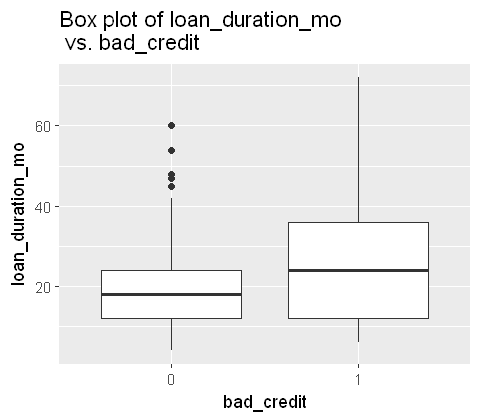

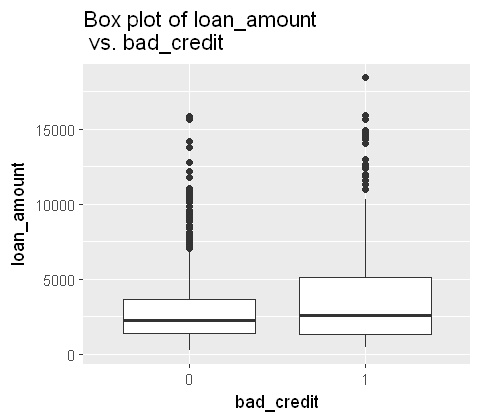

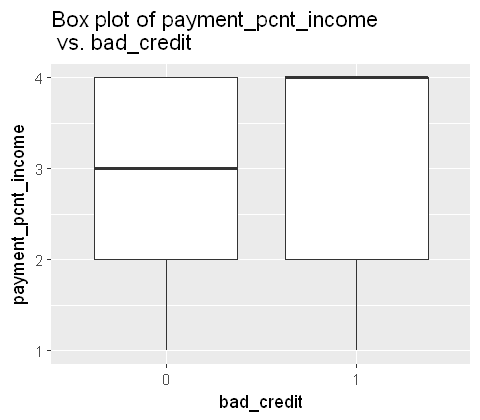

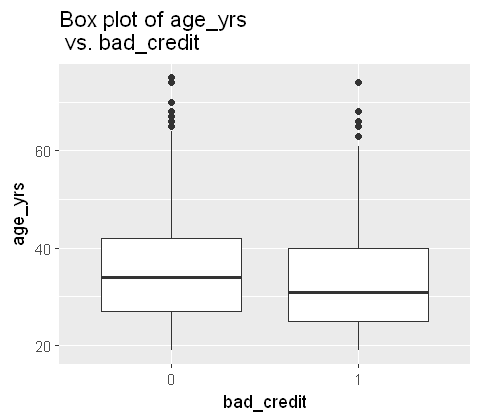

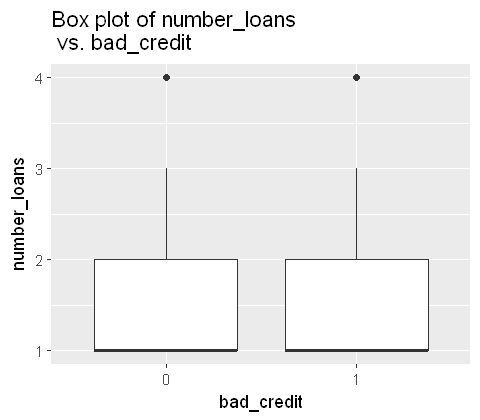

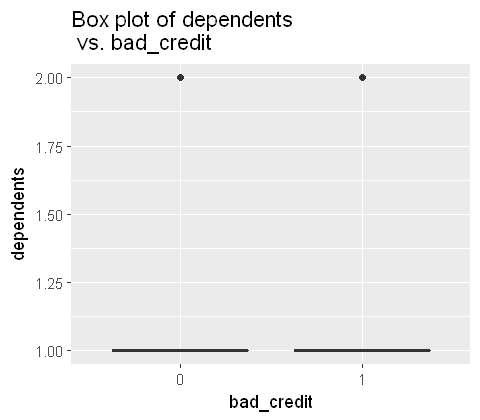

In [83]:
plot_box = function(df, cols, col_x = 'bad_credit'){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col_x, col)) + 
                   geom_boxplot() +
                   ggtitle(paste('Box plot of', col, '\n vs.', col_x))
        print(p)
    }
}

num_cols = c('loan_duration_mo', 'loan_amount', 'payment_pcnt_income',
            'age_yrs', 'number_loans', 'dependents')
plot_box(credit, num_cols)  

How can you interpret these results? Box plots are useful, since by their very construction you are forced to focus on the overlap (or not) of the quartiles of the distribution. In this case, the question is there sufficient differences in the quartiles for the feature to be useful in separation the label classes? There are there are three cases displayed above:
1. For loan duration in months, loan amount, and payment as a precent of income, there is useful separation between good and bad credit customers. As one might expect, bad credit customers have longer loan duration on larger loans and with payments being a greater percentage of their income. 
2. On the other hand, age in years, number of loans and number of dependens does not seem to matter. In latter two cases, this situation seems to result from the median value being zero. There are just not enough non-zero cases to make these useful features. 

As an alternative to box plots, you can use violin plots to examine the separation of label cases by numeric features. Execute the code in the cell below and examine the results:

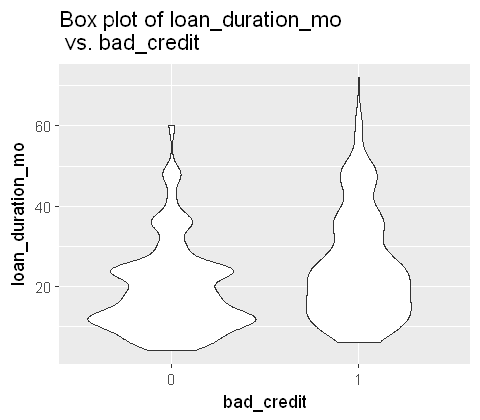

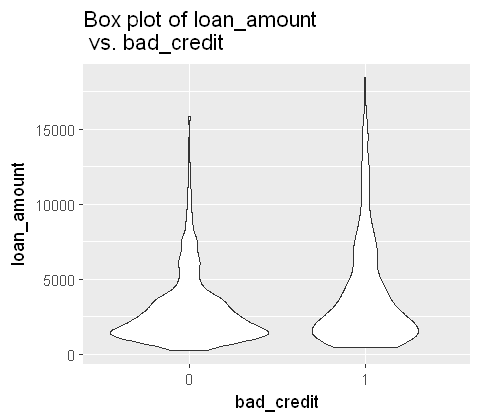

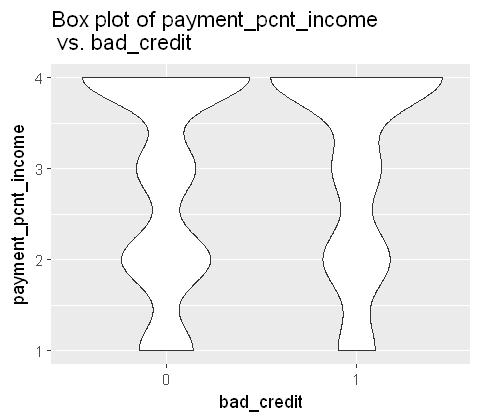

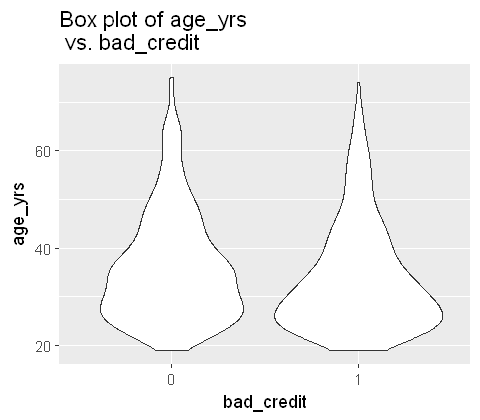

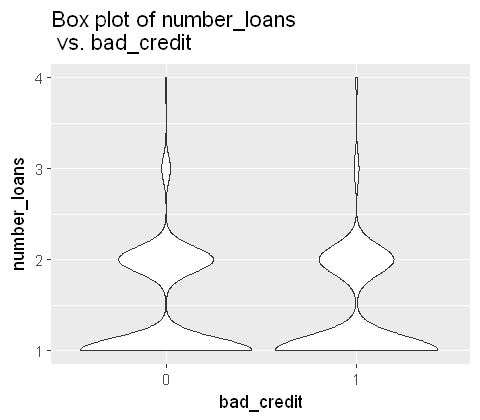

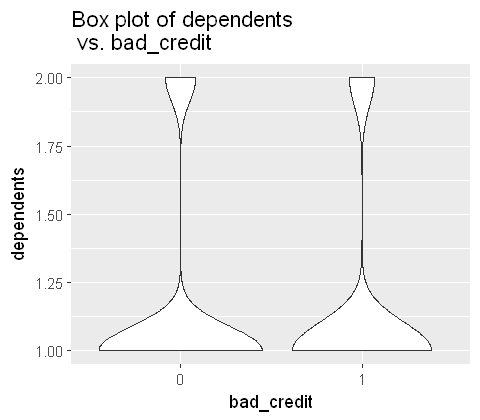

In [84]:
plot_violin = function(df, cols, col_x = 'bad_credit'){
    options(repr.plot.width=4, repr.plot.height=3.5) # Set the initial plot area dimensions
    for(col in cols){
        p = ggplot(df, aes_string(col_x, col)) + 
                   geom_violin() +
                   ggtitle(paste('Box plot of', col, '\n vs.', col_x))
        print(p)
    }
}

plot_violin(credit, num_cols)  

The interpretation of these plots is largely the same as the box plots. However, there is one detail worth noting. The differences between loan duration and loan amount for good and bad credit customers are only for the more extreme values. It may be that these features are less useful and the box plot indicates. 

## Visualizing class separation by categorical features

Now you will turn to the problem of visualizing the ability of categorical features to separate classes of the label. Ideally, a categorical feature will have very different counts of the categories for each of the label values. A good way to visualize these relationships is with bar plots.

The code in the cell below creates side by side plots of the categorical variables for each of the labels categories. Execute this code and examine the results.

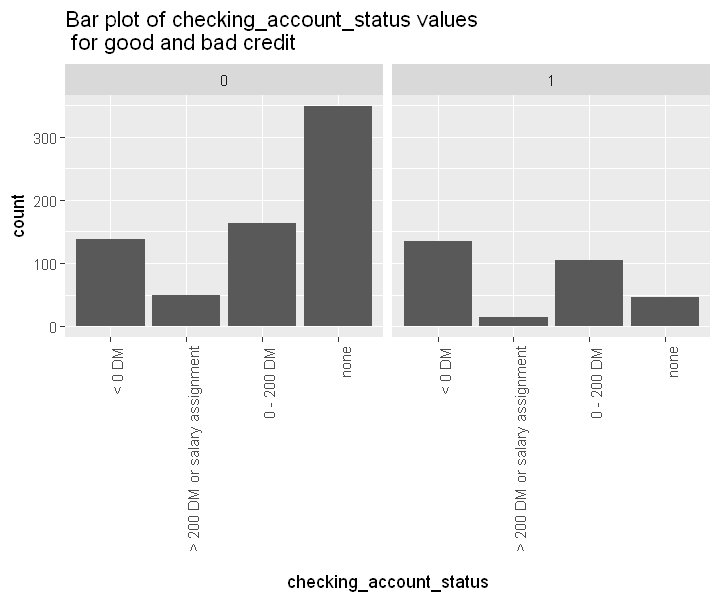

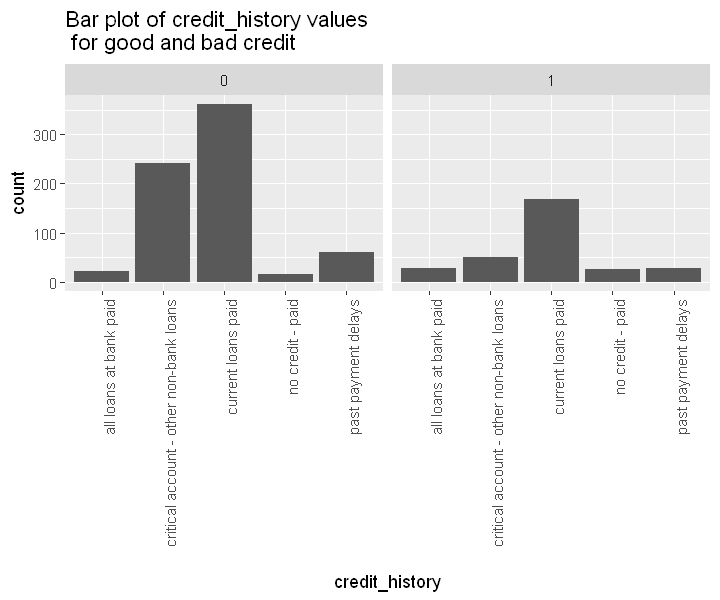

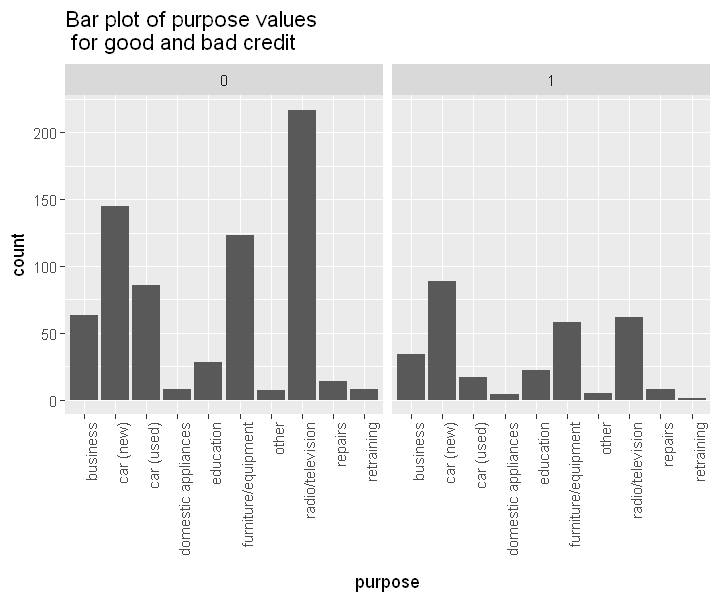

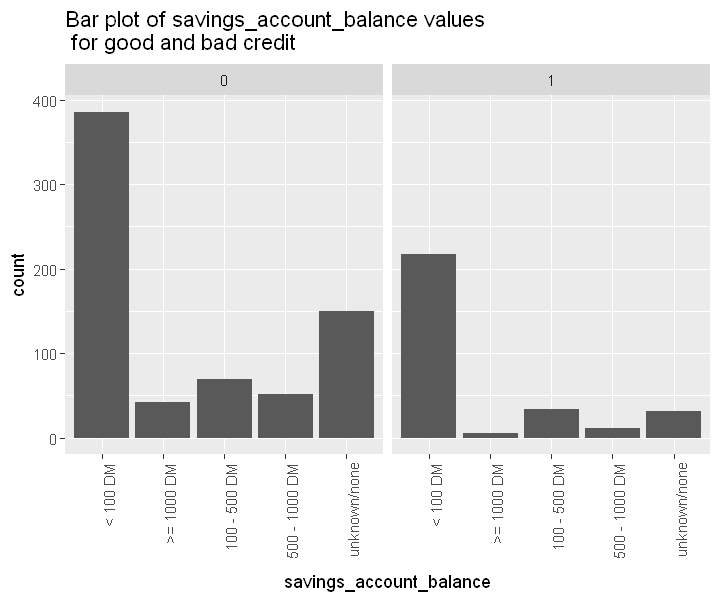

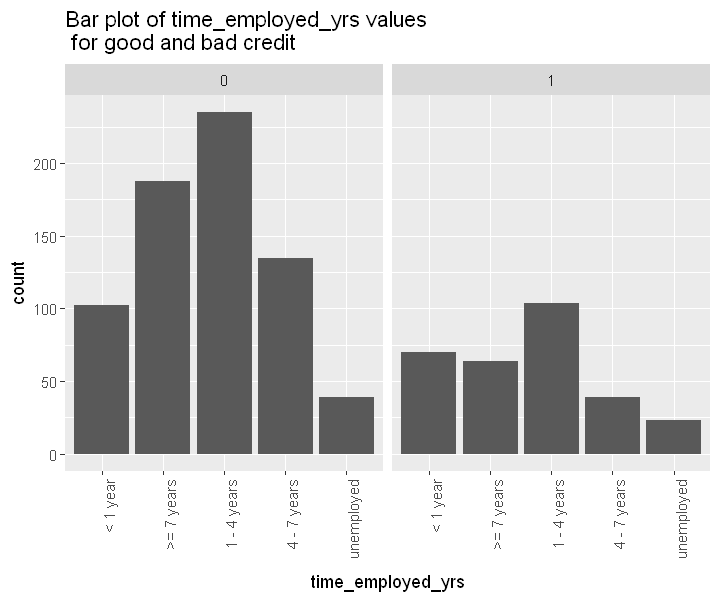

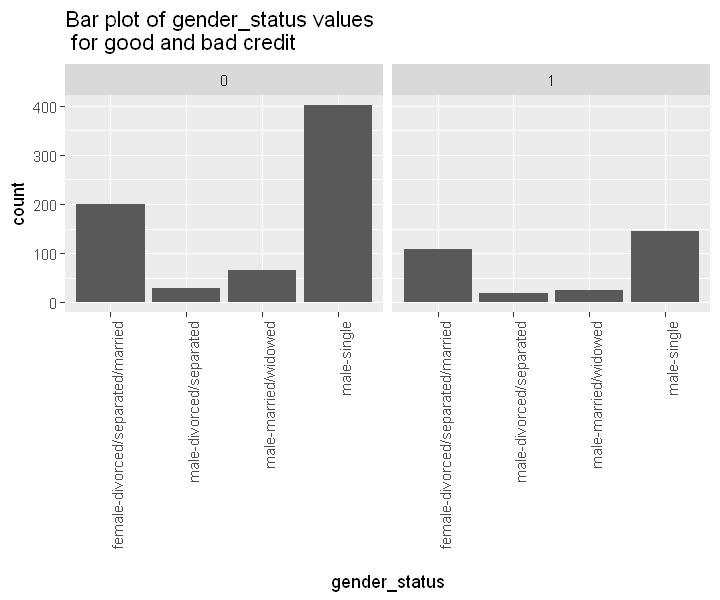

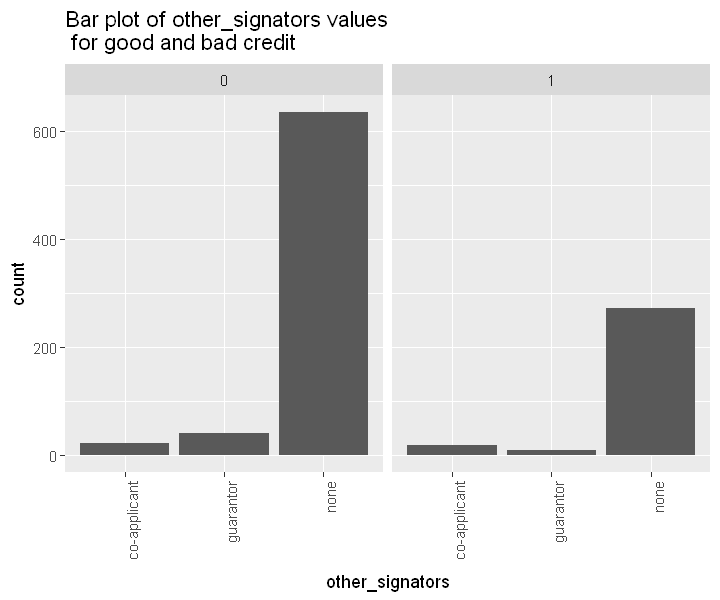

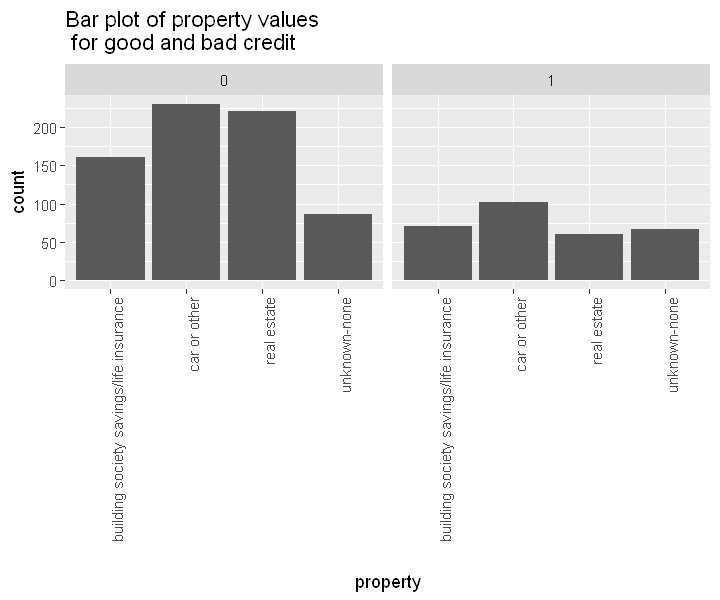

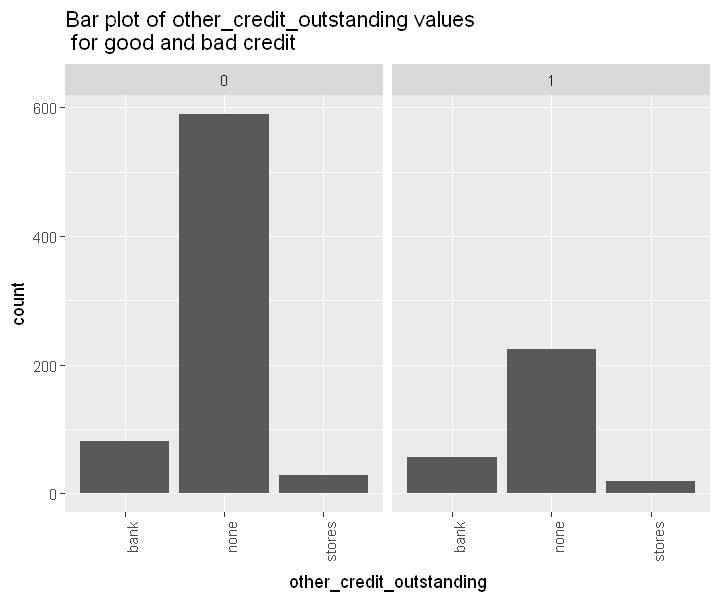

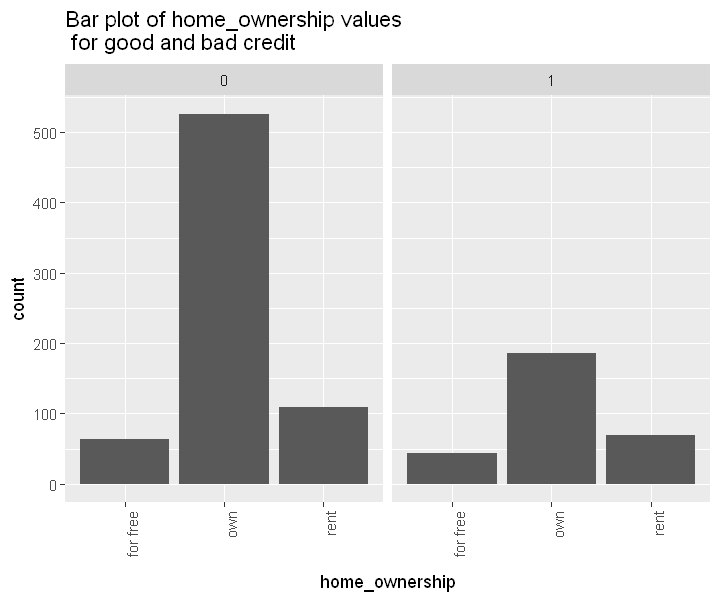

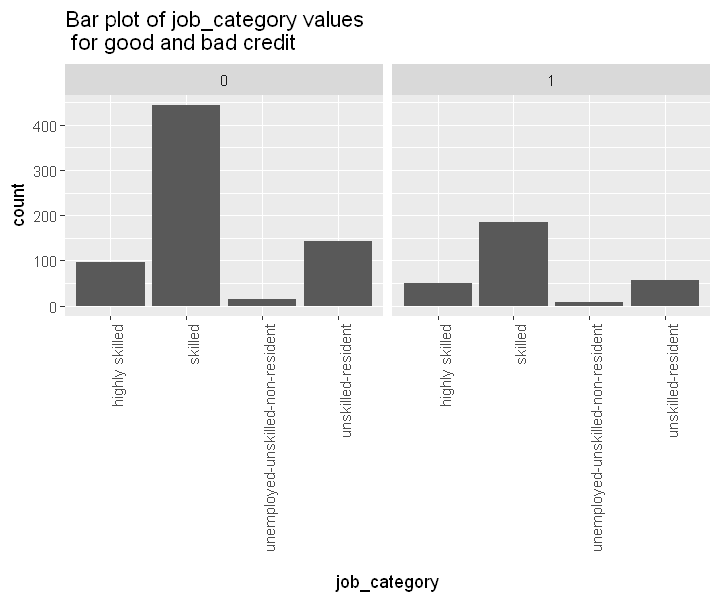

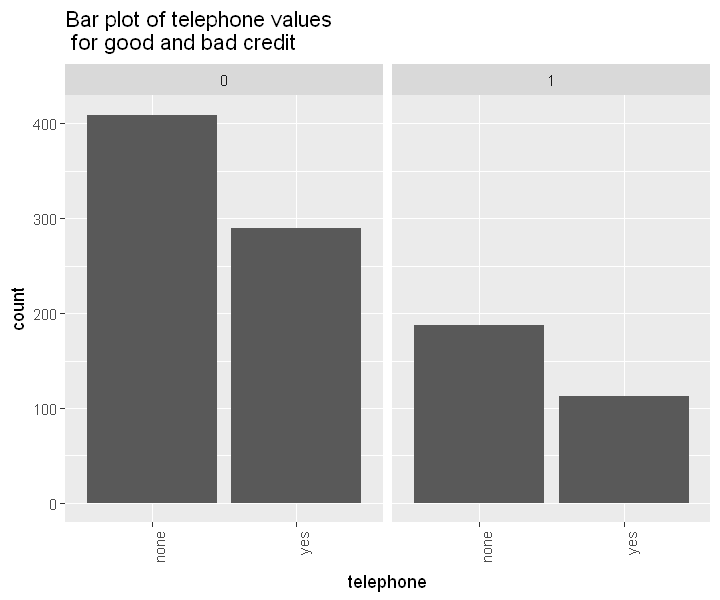

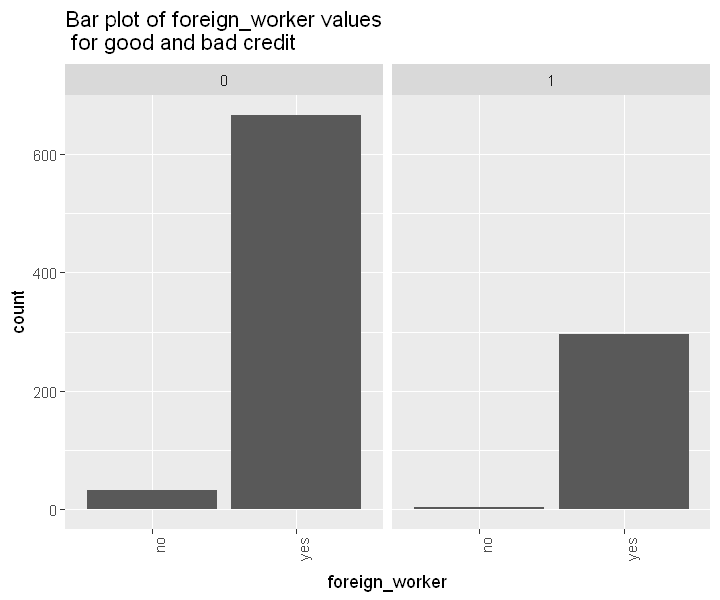

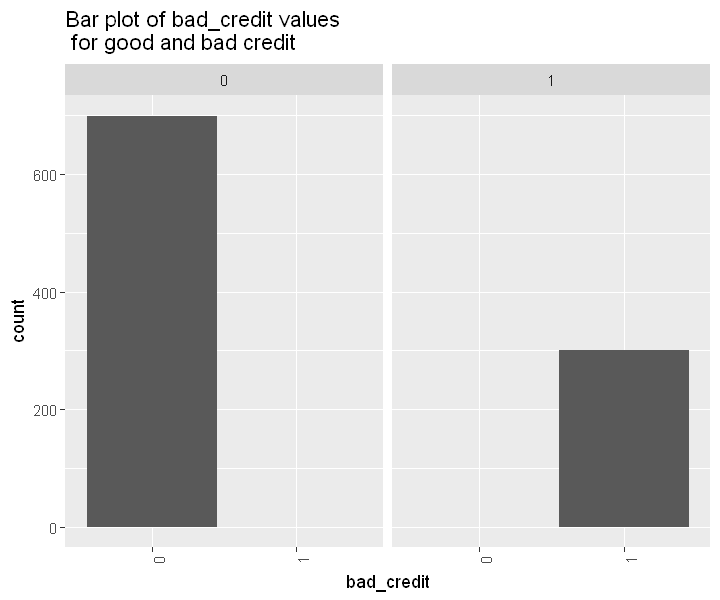

In [85]:
plot_bars = function(df, catcols){
    options(repr.plot.width=6, repr.plot.height=5) # Set the initial plot area dimensions
    for(col in cat_cols){
            p = ggplot(df, aes_string(col)) + 
                       geom_bar() +
                       facet_grid(. ~ bad_credit) + 
                       ggtitle(paste('Bar plot of', col, 'values \n for good and bad credit')) +  
                       theme(axis.text.x = element_text(angle = 90, hjust = 1))
            print(p)
    }
}

plot_bars(credit, cat_cols)    

There is a lot of information in these plots. The key to interpretation of these plots is comparing the proportion of the categories for each of the label values. If these proporations are distinctly different for each label category, the feature is likely to be useful in separating the label.  

There are several cases evident in these plots:
1. Some features such as checking account status and credit history have significantly different distribution of categories between the label categories. 
2. Others features such as gender status and telephones show small differences, but these differences are unlikely to be significant. 
3. Yet other features like other signatories, foreign worker, home ownership, and job category have a dominant category with very few cases of other categories. These features will likely have very little power to seperate the cases.  

Notice that only a few of these categorical features will be useful in seperating the cases. 

## Summary

In this lab you have performed exploration and visualization to understand the relationships in a classification dataset. Specifically:
1. Looked for imbalance in the label cases using a frequency table. 
2. the goal of visualizaution is to find numeric or categormical features that seperate the cases.